In [298]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import sympy as smp

## Propeller data

In [299]:
D = 11 * 25.4 / 1000 # diameter in meters
rho = 1.22 # air density
Va = 17 # horizontal flight velocity
D3 = np.loadtxt('3000RPM.txt', dtype=float, skiprows=1)
J3 = D3[:, 0]
ct3 = D3[:, 1]
cq3 = D3[:, 2] / (2*np.pi)
eta3 = D3[:, 3]

D4 = np.loadtxt('4000RPM.txt', dtype=float, skiprows=1)
J4 = D4[:, 0]
ct4 = D4[:, 1]
cq4 = D4[:, 2] / (2*np.pi)
eta4 = D4[:, 3]

D5 = np.loadtxt('5000RPM.txt', dtype=float, skiprows=1)
J5 = D5[:, 0]
ct5 = D5[:, 1]
cq5 = D5[:, 2] / (2*np.pi)
eta5 = D5[:, 3]

D6 = np.loadtxt('6000RPM.txt', dtype=float, skiprows=1)
J6 = D6[:, 0]
ct6 = D6[:, 1]
cq6 = D6[:, 2] / (2*np.pi)
eta6 = D6[:, 3]

Ct = np.concatenate((ct3, ct4), axis=0)
Ct = np.concatenate((Ct, ct5), axis=0)
Ct = np.concatenate((Ct, ct6), axis=0)

Cq = np.concatenate((cq3, cq4), axis=0)
Cq = np.concatenate((Cq, cq5), axis=0)
Cq = np.concatenate((Cq, cq6), axis=0)

J = np.concatenate((J3, J4), axis=0)
J = np.concatenate((J, J5), axis=0)
J = np.concatenate((J, J6), axis=0)

eta = np.concatenate((eta3, eta4), axis=0)
eta = np.concatenate((eta, eta5), axis=0)
eta = np.concatenate((eta, eta6), axis=0)

## Motor Data

(np.float64(0.014348412619889665),
 np.float64(0.0018500836826708298),
 np.float64(0.016744745570128883),
 0.010851473392629226,
 array([ 5.56178253,  5.44026932,  5.31708104,  5.19224246,  5.06577836,
         4.93771351,  4.80807268,  4.67688064,  4.54416216,  4.40994201,
         4.27424497,  4.13709581,  3.99851929,  3.85854019,  3.71718329,
         3.57447334,  3.43043514,  3.28509343,  3.13847301,  2.99059863,
         2.84149508,  2.69118711,  2.53969951,  2.38705705,  2.23328449,
         2.0784066 ,  1.92244817,  1.76543396,  1.60738874,  1.44833729,
         1.28830437,  1.12731476,  0.96539323,  0.80256455,  0.63885349,
         0.47428482,  0.30888332,  0.14267375, -0.02431911, -0.19207049,
        -0.36055562, -0.52974972, -0.69962803, -0.87016578, -1.04133819,
        -1.21312049, -1.38548791, -1.55841568, -1.73187903, -1.90585318]))

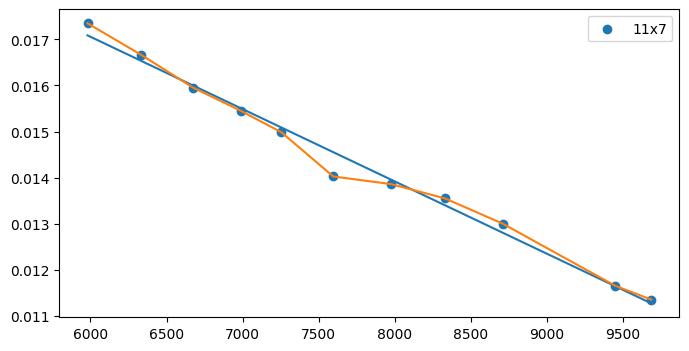

In [300]:
MD = np.loadtxt('C:/Users/PC/Education/SKAT2025/KB-102_SKAT_2025/ПромежуточныйДизайн/СиловаяУстановка/AT2820.txt', dtype= float, skiprows=1)
i0 = float(MD[0, 2])
R = float(MD[0, 1])
kv = MD[0,0] # RPM/volts
kv = float(2*np.pi * kv /60 ) # Volts/(rad/sec)
kq = float(1/kv)
kv = kv**-1
MD, kv

# AT2820 torque coef for 11x7 and 12x6
fig3, ax3 = plt.subplots(1,1, figsize=(8,4))
test = np.loadtxt('C:/Users/PC/Education/SKAT2025/KB-102_SKAT_2025/ПромежуточныйДизайн/СиловаяУстановка/test.txt', dtype= float)
test2 = np.loadtxt('C:/Users/PC/Education/SKAT2025/KB-102_SKAT_2025/ПромежуточныйДизайн/СиловаяУстановка/test2.txt', dtype= float)
curr = test[:, 2]
torq = test[:, 5]
coef = torq/curr
omegakq = test[:, 4]

pkq = np.polyfit(omegakq, coef, 1)
fpkq = interp1d(omegakq, coef, 'linear')

curr2 = test2[:, 2]
torq2 = test2[:, 5]
coef2= torq2/curr2

test3 = np.loadtxt('C:/Users/PC/Education/SKAT2025/KB-102_SKAT_2025/ПромежуточныйДизайн/СиловаяУстановка/test3.txt', dtype= float)
curr3 = test3[:, 2]
torq3 = test3[:, 5]
coef3 = torq3/curr3
ax3.scatter(omegakq, coef, label = '11x7')
ax3.plot(omegakq, np.polyval(pkq, omegakq))
ax3.plot(omegakq, fpkq(omegakq))
# ax3.plot(curr2, coef2, label = '12x6')
# ax3.plot(curr3, coef3, label = '13x6.5')
ax3.legend()
np.mean(coef), np.std(coef), np.polyval(pkq, 6200), kv, np.polyval(pkq, np.linspace(5000, 7000))*((7.5 - kv*np.linspace(5000, 7000)*2*np.pi/60)/R - i0)*np.linspace(5000, 7000)*2*np.pi/60 / (7.52 * 10.5)

## Functions

In [ ]:
pcq = np.polyfit(J, Cq, 2)
pcq3 = np.polyfit(J3, cq3, 2)
pcq4 = np.polyfit(J4, cq4, 2)
pcq5 = np.polyfit(J5, cq5, 2)
pcq6 = np.polyfit(J6, cq6, 2)
pct = np.polyfit(J, Ct, 2)
pct3 = np.polyfit(J3, ct3, 2)
pct4 = np.polyfit(J4, ct4, 2)
pct5 = np.polyfit(J5, ct5, 2)
pct6 = np.polyfit(J6, ct6, 2)
peta = np.polyfit(J, eta, 2)

def GetAR(Om, V):
    om = Om * 2 * np.pi / 60
    return 2*np.pi*V/(om * D)

def GetOmega(AR, V): 
    return (2 * np.pi * V / (D * AR)) / (2 * np.pi) * 60

# def GetThrust(Om, V):
#     om = Om * 2 * np.pi / 60
#     return rho * D**4 * om**2 * np.polyval(pct, GetAR(Om, V)) / (4 * np.pi**2)

# def GetTorque(Om, V):
#     om = Om * 2 * np.pi / 60
#     return rho * D**5 * om**2 * np.polyval(pcq, GetAR(Om, V)) / (4 * np.pi**2)

def GetMTorque(Om, Vin):
    om = Om * 2 * np.pi / 60
    return kv*((Vin - kv*om)/R - i0)

def GetTorque(Om, V):
    om = Om * 2 * np.pi / 60
    r = om
    for i in range(np.size(Om)):
        if Om[i] < 3500:
            r[i] = rho * D**5 * om[i]**2 * np.polyval(pcq3, GetAR(Om[i], V)) / (4 * np.pi**2)
        if Om[i] < 4500 and Om[i] >= 3500:
            r[i] = rho * D**5 * om[i]**2 * np.polyval(pcq4, GetAR(Om[i], V)) / (4 * np.pi**2)
        if Om[i] < 5500 and Om[i] >= 4500:
            r[i] = rho * D**5 * om[i]**2 * np.polyval(pcq5, GetAR(Om[i], V)) / (4 * np.pi**2)
        if Om[i] >= 5500:
            r[i] = rho * D**5 * om[i]**2 * np.polyval(pcq6, GetAR(Om[i], V)) / (4 * np.pi**2)
    return r

def GetThrust(Om, V):
    om = Om * 2 * np.pi / 60
    r = om
    for i in range(np.size(Om)):
        if Om[i] < 3500:
            r[i] = rho * D**4 * om[i]**2 * np.polyval(pct3, GetAR(Om[i], V)) / (4 * np.pi**2)
        if Om[i] < 4500 and Om[i] >= 3500:
            r[i] = rho * D**4 * om[i]**2 * np.polyval(pct4, GetAR(Om[i], V)) / (4 * np.pi**2)
        if Om[i] < 5500 and Om[i] >= 4500:
            r[i] = rho * D**4 * om[i]**2 * np.polyval(pct5, GetAR(Om[i], V)) / (4 * np.pi**2)
        if Om[i] >= 5500:
            r[i] = rho * D**4 * om[i]**2 * np.polyval(pct6, GetAR(Om[i], V)) / (4 * np.pi**2)
    return r

# def GetMEff(Om, Vin):
#     om = Om * 2 * np.pi / 60
#     Qm = GetMTorque(Om, Vin)
#     return Qm*om * R/ (Vin * (Vin - kv*om))

def GetMEff(Om, Vin):
    om = Om * 2 * np.pi / 60
    i = GetMTorque(Om, Vin)/kv + i0
    return GetMTorque(Om, Vin) * om / (i * Vin)

def GetMPower(Vin, Om):
    om  = Om * 2 * np.pi / 60
    return Vin * (Vin - kv*om)/R

def GetPower(Om, V):
    om = Om * 2 * np.pi / 60
    return GetTorque(Om, V) * om

GetMTorque(6200, 7.38), GetTorque(np.array([6200]), 17), GetPower(np.array([6200]), 17)

(0.07572254253653822, array([0.11671576]), array([75.77916698]))

(0.0, 0.9)

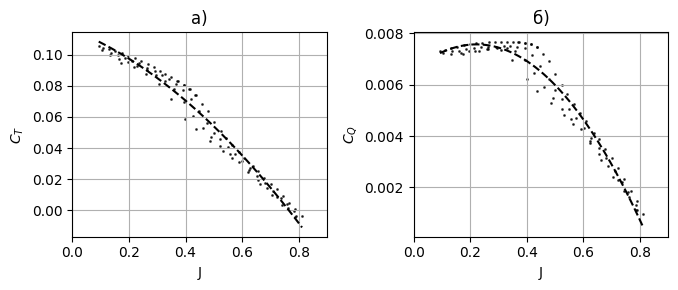

In [302]:
fig1, ax1 = plt.subplots(1,2, figsize=(87.4*2/25.4, 3))
fig1.set_layout_engine('tight')
ax1 = ax1.ravel()
ax1[0].scatter(J, Ct, s=1, c='black', alpha=0.7)
ax1[0].plot(np.linspace(np.min(J), np.max(J)), np.polyval(pct, np.linspace(np.min(J), np.max(J))), '--', c='black')
ax1[0].set_xlabel('J')
ax1[0].set_ylabel(r'$C_T$')
ax1[0].grid('Major')
ax1[0].set_title('a)')
ax1[1].set_title('б)')
ax1[0].set_xlim(0, 0.9)
ax1[1].scatter(J, Cq, s=1, c='black', alpha=0.7)
ax1[1].plot(np.linspace(np.min(J), np.max(J)), np.polyval(pcq, np.linspace(np.min(J), np.max(J))), '--', c='black')
ax1[1].set_xlabel('J')
ax1[1].set_ylabel(r'$C_Q$')
ax1[1].grid('Major')
ax1[1].set_xlim(0, 0.9)

# ax1[2].scatter(J, eta, s=1, c='black', alpha=0.7)
# ax1[2].plot(J5, eta5, '--', c='black')
# ax1[2].set_ylim(0, 0.8)
# ax1[2].set_xlim(0, 0.9)
# ax1[2].grid('Major')

# plt.savefig('КоэффТягиМомент.png', dpi=300, bbox_inches='tight', pad_inches = 0.05)

(10.56783216783217, 0.11467654958700203, 0.010851473392629226)

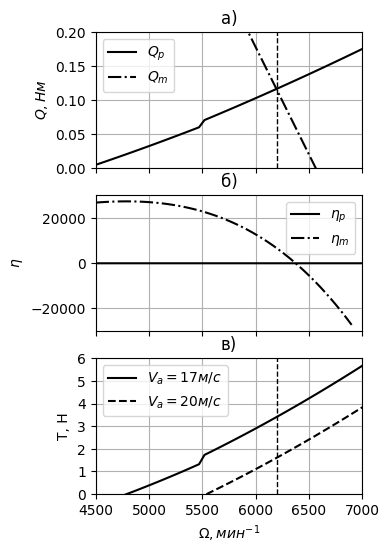

In [305]:
fig2, ax2 = plt.subplots(3,1, figsize=(87.4 /25.4, 6))
ax2.ravel()

Vin = 7.52

ax2[0].plot(np.linspace(4500, 7000), GetTorque(np.linspace(4500, 7000), Va), label = r'$Q_{p}$', color='black')
ax2[0].plot(np.linspace(4500, 7000), GetMTorque(np.linspace(4500, 7000), Vin), '-.',label = r'$Q_{m}$', color='black')
ax2[0].vlines(6200, 0, 0.2, linestyle='--', color='black', linewidth=1)
ax2[0].set_ylim(0, 0.2)
ax2[0].set_ylabel(r'$Q, Н м$')
ax2[0].set_xticks(ticks = np.linspace(4500, 7000, 6), labels = [' ', ' ', ' ', ' ', ' ', ' '], color='w')
ax2[0].set_xlim(4500, 7000)
ax2[0].grid('Major')
ax2[0].legend()
ax2[0].set_title('a)')

ax2[1].plot(GetOmega(J6, Va), eta6, label = r'$\eta_{p}$', color='black')
ax2[1].vlines(6200, 0, 1, linestyle='--', color='black', linewidth=1)
ax2[1].plot(np.linspace(4500, 6900), GetMEff(np.linspace(4500, 6900), Vin), '-.',label = r'$\eta_{m}$', color='black')
# ax2[1].set_ylim(0, 1)
ax2[1].set_xlim(4500, 7000)
ax2[1].set_ylabel(r'$\eta$')
ax2[1].set_xticks(ticks = np.linspace(4500, 7000, 6), labels = [' ', ' ', ' ', ' ', ' ', ' '], color='w')
ax2[1].grid('Major')
ax2[1].legend()
ax2[1].set_title('б)')

ax2[2].plot(np.linspace(4500, 7000), GetThrust(np.linspace(4500, 7000), Va), color='black', label=r'$V_a = 17 м/с$')
ax2[2].plot(np.linspace(4500, 7000), GetThrust(np.linspace(4500, 7000), 20), '--', color='black', label=r'$V_a = 20 м/с$')
ax2[2].vlines(6200, 0, 7, linestyle='--', color='black', linewidth=1)
ax2[2].set_ylim(0, 6)
ax2[2].set_xlim(4500, 7000)
ax2[2].set_ylabel('T, Н')
ax2[2].set_yticks(ticks = [0, 1, 2, 3, 4, 5, 6], labels = ['0', '1','2','3','4','5','6'])
ax2[2].grid('Major')
ax2[2].set_xlabel(r'$\Omega, мин^{-1}$')
ax2[2].set_title('в)')
ax2[2].legend()
# plt.savefig('ПодборМотора.png', dpi=300, bbox_inches='tight', pad_inches = 0)
GetMTorque(6200, Vin)/kv, GetMTorque(6200, Vin), kv

(np.float64(0.014348412619889665), np.float64(0.0018500836826708298))

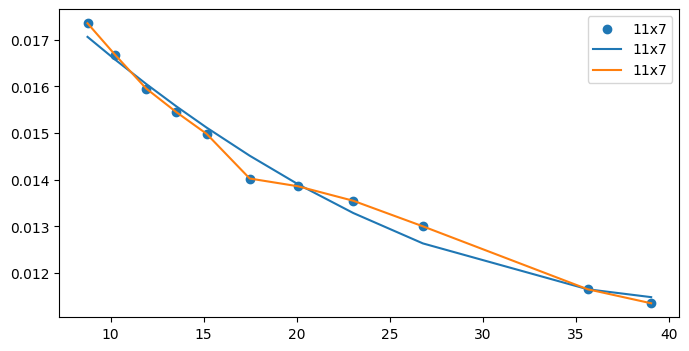

In [304]:
# AT2820 torque coef for 11x7 and 12x6
fig3, ax3 = plt.subplots(1,1, figsize=(8,4))
test = np.loadtxt('C:/Users/PC/Education/SKAT2025/KB-102_SKAT_2025/ПромежуточныйДизайн/СиловаяУстановка/test.txt', dtype= float)
test2 = np.loadtxt('C:/Users/PC/Education/SKAT2025/KB-102_SKAT_2025/ПромежуточныйДизайн/СиловаяУстановка/test2.txt', dtype= float)
curr = test[:, 2]
torq = test[:, 5]
coef = torq/curr

pkq = np.polyfit(curr, coef, 2)
fpkq = interp1d(curr, coef, 'linear')

curr2 = test2[:, 2]
torq2 = test2[:, 5]
coef2= torq2/curr2

test3 = np.loadtxt('C:/Users/PC/Education/SKAT2025/KB-102_SKAT_2025/ПромежуточныйДизайн/СиловаяУстановка/test3.txt', dtype= float)
curr3 = test3[:, 2]
torq3 = test3[:, 5]
coef3 = torq3/curr3
ax3.scatter(curr, coef, label = '11x7')
ax3.plot(curr, np.polyval(pkq, curr), label = '11x7')
ax3.plot(curr, fpkq(curr), label = '11x7')
# ax3.plot(curr2, coef2, label = '12x6')
# ax3.plot(curr3, coef3, label = '13x6.5')
ax3.legend()
np.mean(coef), np.std(coef)